Project 1: Exploratory Data Analysis

Exploratory Data Analysis using Jupyter and Python3 for data set acquired from : 
https://salaries.news.baltimoresun.com/

The 2019 Maryland State Employees salaries dataset, there are various variables taken into account: the employee's first name, middle initial, last name, suffix, system, agency, organizations, subtitle, class code, annual salary, pay rate, regular earnings, overtime earnings, other earnings, ytd gross earnings, and term date. In my analysis, I have mainly focused on the organization, annual salary, regular earnings, overtime earnings, other earnings, and ytd earnings to analyze how much each Maryland State Department earning during 2019. It is crucial to analyze these specific variables to analyze how average annual salaries earned and average total earnings per department has changed each year. Although in my analysis, I am only focusing on the 2019 dataset. 

The dataset is legal and free accessed through the website. 



In this notebook, I will be analyzing the 2019 dataset containing information on Maryland State employees's salaries in 2019 varied by each department. Using the data set, I plan on finding the total average annual salary per department to see which department has the highest and lowest average salary earnings, and calculate the total average earnings per department to see which department has the largest/least amount. Fortunately, the dataset is large enough and contains enough information for me to anlayze the data from different perspectives.

Question: Which Maryland State Department has that largest average salary and average total earnings in 2019? 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import statistics
from collections import Counter
import operator


In [2]:
#1. Read in the dataset and put into a dataframe

df = pd.read_csv(r'C:\Users\alido\OneDrive\Desktop\cy2019-md.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Using shape, I want to see how many rows and columns there are in the dataset for me to work with

In [3]:
#How many rows and columns

rows = df.shape[0]
print("There are", rows, "rows")

columns = df.shape[1]
print("There are", columns, "columns")

There are 174997 rows
There are 16 columns


By using df.head, df.tail, df.describe, and df.dtypes below, I realized that the dataset  is tidy, and will not require additional cleaning on my end.  

In [4]:
df.head()

,first_name,middle_initial,last_name,suffix,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,term_date
0,JOHN,C,POLIKS,NaN,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,8096,71000.0,A,70000,14000,500,85000,NaN
1,CARL,NaN,CHAMBERLIN,NaN,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,515,96000.0,A,93000,0,500,94000,NaN
2,JOSEPHINE,K,OBONYO,NaN,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,4849,73000.0,A,69000,0,2800,71000,NaN
3,LORI,J,MCFARLIN,NaN,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,7480,73000.0,A,70000,1000,2200,74000,NaN
4,ELWOOD,D,HALL,JR,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,7896,52000.0,A,51000,18000,1800,70000,NaN


In [5]:
df.tail()

,first_name,middle_initial,last_name,suffix,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,term_date
174992,EDDIE,L,JOHNSON,NaN,CT,500216,REGISTER OF WILLS,NaN,8990,18.51,H,19000,0,0,19000,NaN
174993,JAMES,NaN,JENNINGS,NaN,CT,500216,REGISTER OF WILLS,NaN,8990,0.00,H,7000,0,0,7000,2019-06-30T00:00:00Z
174994,EDNA,M,BLUE,NaN,CT,500220,REGISTER OF WILLS,NaN,9702,18.39,H,12000,0,200,12000,NaN
174995,CAROLE,NaN,ABRUZZESE,NaN,CT,500220,REGISTER OF WILLS,NaN,9702,18.39,H,8000,0,100,8000,NaN
174996,FENDA,P,WHITELOCK,NaN,CT,500222,REGISTER OF WILLS,NaN,9702,18.77,H,8000,0,500,9000,NaN


In [6]:
df.describe()

,agency,class_code,annual_salary,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings
count,174997.000000,174997.000000,174997.000000,174997.000000,174997.000000,1.749970e+05,1.749970e+05
mean,336681.773539,4220.277468,32332.903477,32136.368052,1656.483825,2.446075e+03,3.623881e+04
std,45957.199216,3321.050493,44917.711179,42001.742161,7295.668501,1.001522e+04,4.516547e+04
min,210101.000000,1.000000,0.000000,-4000.000000,-2000.000000,-1.820000e+04,0.000000e+00
25%,321209.000000,1111.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000e+03
50%,360222.000000,2941.000000,153.340000,16000.000000,0.000000,5.000000e+02,2.200000e+04
75%,360227.000000,8200.000000,55000.000000,52000.000000,0.000000,1.500000e+03,5.800000e+04
max,500224.000000,9991.000000,961000.000000,965000.000000,139000.000000,2.427400e+06,3.047000e+06


In [7]:
df.dtypes

first_name             object
middle_initial         object
last_name              object
suffix                 object
system                 object
agency                  int64
organization           object
subtitle               object
class_code              int64
annual_salary         float64
pay_rate               object
regular_earnings        int64
overtime_earnings       int64
other_earnings          int64
ytd_gross_earnings      int64
term_date              object
dtype: object

In [51]:
#I want to see what columns are included in the dataset

for col in df:
    print(col)

first_name
middle_initial
last_name
suffix
system
agency
organization
subtitle
class_code
annual_salary
pay_rate
regular_earnings
overtime_earnings
other_earnings
ytd_gross_earnings
term_date
total_earnings


After analyzing the dataset, it's evident that one of the main challenges with the dataset is that each department is listed as a value in the column "organization", so it will be difficult to calculate the total average salary earned by each department when the dataset is not formatted in a such a way for us to easily compare. In the below, I use a for loop to iterate through each organization and calculate the average "annual_salary" per department. 

In [9]:
#By using .unique(), an array with all of the unique values in the column is returned. Then, using the statisics 
#package in python, calculate average salary earned per department. 

organizations=[]
avg_annual_salary_list=[]

for which_org in df['organization'].unique():   #looking for unique values in the column "organization"
    print(which_org)
    organizations.append(which_org)               #added each organization to an empty list so I can create it into a dictionary later
    
    avg_annual_salary = round(statistics.mean(df['annual_salary'][df['organization'] == which_org]),2)
    print(avg_annual_salary)
    avg_annual_salary_list.append(avg_annual_salary) #added each average salary to an empty list for the dictionary



DEPARTMENT OF TRANSPORTATION
51379.87
GENERAL ASSEMBLY OF MARYLAND
34757.18
JUDICIARY
47434.7
OFFICE OF THE PUBLIC DEFENDER
58454.89
OFFICE OF THE ATTORNEY GENERAL
66074.67
OFFICE OF STATE PROSECUTOR
66266.67
MARYLAND TAX COURT
44001.52
WORKERS' COMPENSATION COM
49367.44
PUBLIC SERVICE COMMISSION
65209.05
OFFICE OF PEOPLE'S COUNSEL
67400.0
SUBSEQUENT INJURY FUND
66761.9
MD UNINSURED EMPLOYERS' FUND
67214.29
EXECUTIVE DEPARTMENT
53471.83
MD STADIUM AUTHORITY
47243.39
EXECUTIVE DEPT
37924.98
SECRETARY OF STATE
44517.53
OFFICE ON AGING
29507.05
STATE ARCHIVES
45178.2
OFFICE OF ADMNSTRTV HEARINGS
76180.33
MD ENERGY ADMINISTRATION
47611.0
GOVERNOR'S OFFICE FOR CHILDREN
32416.67
HISTORIC ST. MARY'S CITY COMM
14378.27
BOARD OF PUBLIC WORKS
59585.77
MILITARY DEPARTMENT
2590.8
ST ADM BOARD OF ELECTION LAWS
46048.22
MD COMMISSION ON CIVIL RIGHTS
49917.94
MD FOOD CENTER AUTHORITY
36163.45
MD DEPT OF VETERANS AFFAIRS
34626.25
CANAL PLACE PRESERV & DEV AUTH
53500.0
MD HEALTH BENEFIT EXCHANGE
78493.

In [10]:
#see how many values in each list to make sure they match

vals_in_org = len(organizations)
print("There are",vals_in_org, "organzations")
vals_in_avg = len(avg_annual_salary_list)
print("There are", vals_in_avg, "average annual salaries")


There are 75 organzations
There are 75 average annual salaries


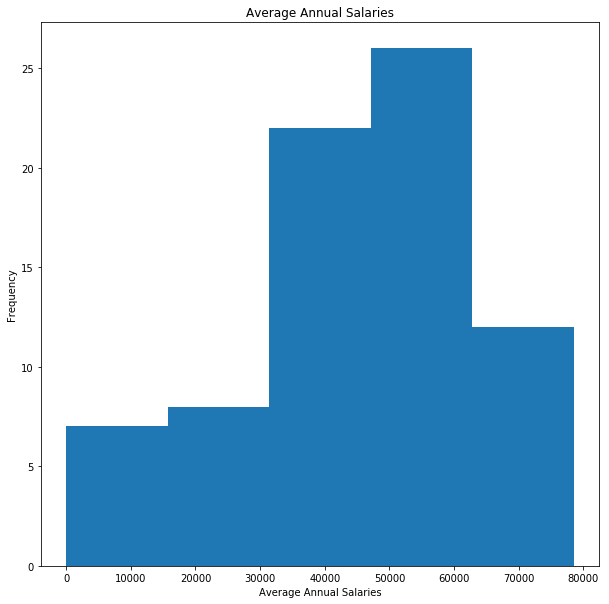

In [50]:
# Plotting the list of the average annual salaries of departments as a histogram

fig,ax= plt.subplots(figsize=(10,10))


plt.hist(avg_annual_salary_list, 5)
plt.xlabel('Average Annual Salaries')
plt.ylabel('Frequency')
plt.title('Average Annual Salaries')
plt.show()

To figure out which department's average annual salary, I want to create a dictionary assigning each average annual salary to the respective department.

In [12]:
# using zip() to convert lists to dictionary 
#ref:https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/

res = dict(zip(organizations, avg_annual_salary_list)) 
print ("Resultant dictionary is : " +  str(res)) 

Resultant dictionary is : {'DEPARTMENT OF TRANSPORTATION': 51379.87, 'GENERAL ASSEMBLY OF MARYLAND': 34757.18, 'JUDICIARY': 47434.7, 'OFFICE OF THE PUBLIC DEFENDER': 58454.89, 'OFFICE OF THE ATTORNEY GENERAL': 66074.67, 'OFFICE OF STATE PROSECUTOR': 66266.67, 'MARYLAND TAX COURT': 44001.52, "WORKERS' COMPENSATION COM": 49367.44, 'PUBLIC SERVICE COMMISSION': 65209.05, "OFFICE OF PEOPLE'S COUNSEL": 67400.0, 'SUBSEQUENT INJURY FUND': 66761.9, "MD UNINSURED EMPLOYERS' FUND": 67214.29, 'EXECUTIVE DEPARTMENT': 53471.83, 'MD STADIUM AUTHORITY': 47243.39, 'EXECUTIVE DEPT': 37924.98, 'SECRETARY OF STATE': 44517.53, 'OFFICE ON AGING': 29507.05, 'STATE ARCHIVES': 45178.2, 'OFFICE OF ADMNSTRTV HEARINGS': 76180.33, 'MD ENERGY ADMINISTRATION': 47611.0, "GOVERNOR'S OFFICE FOR CHILDREN": 32416.67, "HISTORIC ST. MARY'S CITY COMM": 14378.27, 'BOARD OF PUBLIC WORKS': 59585.77, 'MILITARY DEPARTMENT': 2590.8, 'ST ADM BOARD OF ELECTION LAWS': 46048.22, 'MD COMMISSION ON CIVIL RIGHTS': 49917.94, 'MD FOOD CEN

We can figure out which organization has the largest average annual salary, and which department has the smallest. 

In [13]:
# ref:https://stackoverflow.com/questions/42044090/return-the-maximum-value-from-a-dictionary/42044202

max_value = max(res.values())
max_keys = [k for k, v in res.items() if v == max_value] # getting the keys that has the maximum value

print(max_value, max_keys)

78493.15 ['MD HEALTH BENEFIT EXCHANGE']


In [14]:
# ref:https://stackoverflow.com/questions/42044090/return-the-maximum-value-from-a-dictionary/42044202

min_value = min(res.values())
min_keys = [k for k, v in res.items() if v == min_value]

print(min_value, min_keys)


18.73 ['DEPT OF NATURAL RESOURES']


MD Health Benefit Exhange department has the largest average annual salary while the Department of Natural Resources has the smallest average annual salary. Next, I want to plot the dictionary of departments and average annual salary, in order to do so we have to convert the dictionary into a series.

In [16]:
#converting the dictionary into a series:
#ref:https://www.geeksforgeeks.org/creating-a-pandas-series-from-dictionary/


series = pd.Series(res) 
series

DEPARTMENT OF TRANSPORTATION      51379.87
GENERAL ASSEMBLY OF MARYLAND      34757.18
JUDICIARY                         47434.70
OFFICE OF THE PUBLIC DEFENDER     58454.89
OFFICE OF THE ATTORNEY GENERAL    66074.67
OFFICE OF STATE PROSECUTOR        66266.67
MARYLAND TAX COURT                44001.52
WORKERS' COMPENSATION COM         49367.44
PUBLIC SERVICE COMMISSION         65209.05
OFFICE OF PEOPLE'S COUNSEL        67400.00
SUBSEQUENT INJURY FUND            66761.90
MD UNINSURED EMPLOYERS' FUND      67214.29
EXECUTIVE DEPARTMENT              53471.83
MD STADIUM AUTHORITY              47243.39
EXECUTIVE DEPT                    37924.98
SECRETARY OF STATE                44517.53
OFFICE ON AGING                   29507.05
STATE ARCHIVES                    45178.20
OFFICE OF ADMNSTRTV HEARINGS      76180.33
MD ENERGY ADMINISTRATION          47611.00
GOVERNOR'S OFFICE FOR CHILDREN    32416.67
HISTORIC ST. MARY'S CITY COMM     14378.27
BOARD OF PUBLIC WORKS             59585.77
MILITARY DE

Then sort the series using sort_values:

In [17]:
#sort the series
#ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html


series.sort_values(ascending=True)

DEPT OF NATURAL RESOURES             18.73
MILITARY DEPARTMENT                2590.80
PROPERTY TAX ASSMTS APPEAL BDS     2927.42
HISTORIC ST. MARY'S CITY COMM     14378.27
STATE UNIVERSITIES & COLLEGES     15146.57
ST. MARY'S COLLEGE OF MARYLAND    15412.06
BALTO CITY COMMUNITY COLLEGE      15691.55
MORGAN STATE UNIVERSITY           19796.05
MD AFRICAN AMERICAN MUSEUM        27624.83
MARYLAND529                       28872.30
DEPT OF NATURAL RESOURCES         29362.16
OFFICE ON AGING                   29507.05
UNIVERSITY OF MARYLAND            29863.81
MARYLAND SCHOOL FOR THE DEAF      30604.30
MD INS FOR EMERG MED SERV SYS     30617.17
GOVERNOR'S OFFICE FOR CHILDREN    32416.67
DEPARTMENT OF AGRICULTURE         32696.64
MD DEPT OF VETERANS AFFAIRS       34626.25
GENERAL ASSEMBLY OF MARYLAND      34757.18
DEPT OF LABOR, LICENSING & REG    35079.58
MD FOOD CENTER AUTHORITY          36163.45
COMPTROLLER OF MARYLAND           36684.96
EXECUTIVE DEPT                    37924.98
DEPT OF JUV

Since there are so many departments, it will be easier to look at only the top 10 department's annual average salary.

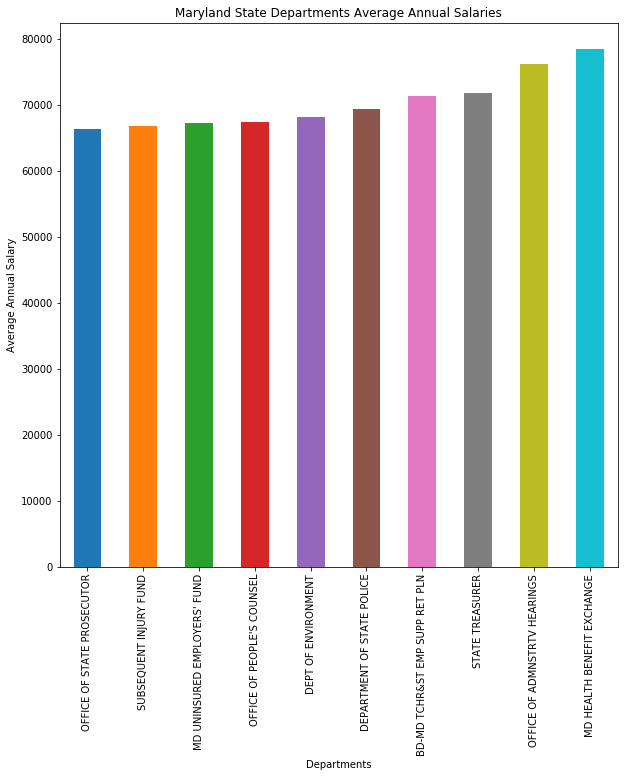

In [46]:
#Plotting the dictionary of departments and annual average salary as a bar graph (only the top 10)

#ref:https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary
#ref: https://stackoverflow.com/questions/38338396/sort-and-limit-number-of-bars-to-display-on-bargraph


fig,ax= plt.subplots(figsize=(10,10))
plt.xlabel('Departments')
plt.ylabel('Average Annual Salary')
plt.title('Maryland State Departments Average Annual Salaries')
plt.xticks(rotation=120)

top10 = series.sort_values(ascending=True).tail(10)
top10.plot(kind='bar')




Instead of calculating each column of earnings per department, I will group them together and calculate the sum of earnings per department (similiar to how I calculated the average salary), and add the sum as a new column to the original dataframe. 

In [19]:
#summing up the earning columns then add it as as a new column "total_earnings" to the dataframe
#regular_earnings
#overtime_earnings
#other_earnings
#ytd_gross_earnings

sum_column = df["regular_earnings"] + df["overtime_earnings"] + df["other_earnings"] + df["ytd_gross_earnings"]
df["total_earnings"] = sum_column
df.head()


,first_name,middle_initial,last_name,suffix,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,term_date,total_earnings
0,JOHN,C,POLIKS,NaN,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,8096,71000.0,A,70000,14000,500,85000,NaN,169500
1,CARL,NaN,CHAMBERLIN,NaN,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,515,96000.0,A,93000,0,500,94000,NaN,187500
2,JOSEPHINE,K,OBONYO,NaN,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,4849,73000.0,A,69000,0,2800,71000,NaN,142800
3,LORI,J,MCFARLIN,NaN,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,7480,73000.0,A,70000,1000,2200,74000,NaN,147200
4,ELWOOD,D,HALL,JR,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,7896,52000.0,A,51000,18000,1800,70000,NaN,140800


Check the new shape of the df with the new column:

In [20]:
print("There are", df.shape[0], "rows and", df.shape[1], "columns.")

There are 174997 rows and 17 columns.


Calculate the total average earnings per department so we can see which department had the largest total earnings. This is done similiarly to finding out which department had the largest average salary. 

In [21]:
organizations_earning=[]
total_earnings_list=[]

for which_org in df['organization'].unique():
    print(which_org)
    organizations_earning.append(which_org)               #added each organization to an empty list so I can 
                                                          #create it into a dictionary later
    
    total_earnings = round(statistics.mean(df['total_earnings'][df['organization'] == which_org]),2)
    print(total_earnings)
    total_earnings_list.append(total_earnings) #added each total earnings to an empty list for the dictionary


DEPARTMENT OF TRANSPORTATION
109500.84
GENERAL ASSEMBLY OF MARYLAND
70432.92
JUDICIARY
99409.36
OFFICE OF THE PUBLIC DEFENDER
115505.32
OFFICE OF THE ATTORNEY GENERAL
129598.2
OFFICE OF STATE PROSECUTOR
123093.33
MARYLAND TAX COURT
89111.11
WORKERS' COMPENSATION COM
103910.97
PUBLIC SERVICE COMMISSION
131234.76
OFFICE OF PEOPLE'S COUNSEL
157605
SUBSEQUENT INJURY FUND
132085.71
MD UNINSURED EMPLOYERS' FUND
134164.29
EXECUTIVE DEPARTMENT
106365.9
MD STADIUM AUTHORITY
97528.5
EXECUTIVE DEPT
79277.16
SECRETARY OF STATE
101000
OFFICE ON AGING
70668.06
STATE ARCHIVES
90358.24
OFFICE OF ADMNSTRTV HEARINGS
147729.51
MD ENERGY ADMINISTRATION
110122.64
GOVERNOR'S OFFICE FOR CHILDREN
128666.67
HISTORIC ST. MARY'S CITY COMM
37318.97
BOARD OF PUBLIC WORKS
118000
MILITARY DEPARTMENT
6236.98
ST ADM BOARD OF ELECTION LAWS
92950.59
MD COMMISSION ON CIVIL RIGHTS
108227.78
MD FOOD CENTER AUTHORITY
76251.35
MD DEPT OF VETERANS AFFAIRS
68532.03
CANAL PLACE PRESERV & DEV AUTH
86125
MD HEALTH BENEFIT EXCHANG

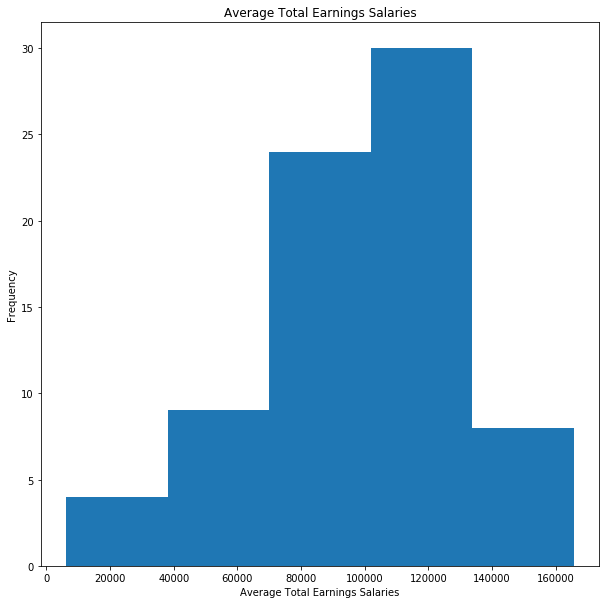

In [49]:
# Plotting the list of the average total earnings of departments as a histogram

fig,ax= plt.subplots(figsize=(10,10))


plt.hist(total_earnings_list, 5)
plt.xlabel('Average Total Earnings Salaries')
plt.ylabel('Frequency')
plt.title('Average Total Earnings Salaries')
plt.show()

In [23]:
# using zip() to convert lists to dictionary 
#ref:https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/

res_earnings = dict(zip(organizations, total_earnings_list)) 
print ("Resultant dictionary is : " +  str(res_earnings)) 

Resultant dictionary is : {'DEPARTMENT OF TRANSPORTATION': 109500.84, 'GENERAL ASSEMBLY OF MARYLAND': 70432.92, 'JUDICIARY': 99409.36, 'OFFICE OF THE PUBLIC DEFENDER': 115505.32, 'OFFICE OF THE ATTORNEY GENERAL': 129598.2, 'OFFICE OF STATE PROSECUTOR': 123093.33, 'MARYLAND TAX COURT': 89111.11, "WORKERS' COMPENSATION COM": 103910.97, 'PUBLIC SERVICE COMMISSION': 131234.76, "OFFICE OF PEOPLE'S COUNSEL": 157605, 'SUBSEQUENT INJURY FUND': 132085.71, "MD UNINSURED EMPLOYERS' FUND": 134164.29, 'EXECUTIVE DEPARTMENT': 106365.9, 'MD STADIUM AUTHORITY': 97528.5, 'EXECUTIVE DEPT': 79277.16, 'SECRETARY OF STATE': 101000, 'OFFICE ON AGING': 70668.06, 'STATE ARCHIVES': 90358.24, 'OFFICE OF ADMNSTRTV HEARINGS': 147729.51, 'MD ENERGY ADMINISTRATION': 110122.64, "GOVERNOR'S OFFICE FOR CHILDREN": 128666.67, "HISTORIC ST. MARY'S CITY COMM": 37318.97, 'BOARD OF PUBLIC WORKS': 118000, 'MILITARY DEPARTMENT': 6236.98, 'ST ADM BOARD OF ELECTION LAWS': 92950.59, 'MD COMMISSION ON CIVIL RIGHTS': 108227.78, 'M

In [24]:
# ref:https://stackoverflow.com/questions/42044090/return-the-maximum-value-from-a-dictionary/42044202

max_value2 = max(res_earnings.values())
max_keys2 = [k for k, v in res_earnings.items() if v == max_value2] # getting the keys that has the maximum value

print(max_value2, max_keys2)

165665.85 ['DEPARTMENT OF STATE POLICE']


In [25]:
min_value2 = min(res_earnings.values())
min_keys2 = [k for k, v in res_earnings.items() if v == min_value2] # getting the keys that has the maximum value

print(min_value2, min_keys2)

6236.98 ['MILITARY DEPARTMENT']


Department of State Police has the largest average total earnings while the Miltary Department has the least average total earnings, while the MD Health Benefit Exchange Department has the largest average salary earned and the Department of Natural Resources has the least average salary earned. 

Sort the average total earnings by the smallest amount average total earnings amount to the largest to plot the data:

In [36]:
#converting the dictionary into a series:
#ref:https://www.geeksforgeeks.org/creating-a-pandas-series-from-dictionary/


series2 = pd.Series(res_earnings) 
series2

DEPARTMENT OF TRANSPORTATION      109500.84
GENERAL ASSEMBLY OF MARYLAND       70432.92
JUDICIARY                          99409.36
OFFICE OF THE PUBLIC DEFENDER     115505.32
OFFICE OF THE ATTORNEY GENERAL    129598.20
OFFICE OF STATE PROSECUTOR        123093.33
MARYLAND TAX COURT                 89111.11
WORKERS' COMPENSATION COM         103910.97
PUBLIC SERVICE COMMISSION         131234.76
OFFICE OF PEOPLE'S COUNSEL        157605.00
SUBSEQUENT INJURY FUND            132085.71
MD UNINSURED EMPLOYERS' FUND      134164.29
EXECUTIVE DEPARTMENT              106365.90
MD STADIUM AUTHORITY               97528.50
EXECUTIVE DEPT                     79277.16
SECRETARY OF STATE                101000.00
OFFICE ON AGING                    70668.06
STATE ARCHIVES                     90358.24
OFFICE OF ADMNSTRTV HEARINGS      147729.51
MD ENERGY ADMINISTRATION          110122.64
GOVERNOR'S OFFICE FOR CHILDREN    128666.67
HISTORIC ST. MARY'S CITY COMM      37318.97
BOARD OF PUBLIC WORKS           

In [37]:
#sort the series
#ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html


series2.sort_values(ascending=True)

MILITARY DEPARTMENT                 6236.98
PROPERTY TAX ASSMTS APPEAL BDS      8681.45
ST. MARY'S COLLEGE OF MARYLAND     35040.40
HISTORIC ST. MARY'S CITY COMM      37318.97
STATE UNIVERSITIES & COLLEGES      38231.40
DEPT OF NATURAL RESOURES           39976.47
BALTO CITY COMMUNITY COLLEGE       43763.10
MORGAN STATE UNIVERSITY            52402.00
MD AFRICAN AMERICAN MUSEUM         53628.89
MARYLAND529                        62902.22
UNIVERSITY OF MARYLAND             65825.69
DEPT OF NATURAL RESOURCES          66785.99
MD DEPT OF VETERANS AFFAIRS        68532.03
GENERAL ASSEMBLY OF MARYLAND       70432.92
OFFICE ON AGING                    70668.06
DEPARTMENT OF AGRICULTURE          71158.90
MARYLAND SCHOOL FOR THE DEAF       71981.51
COMPTROLLER OF MARYLAND            75395.16
MD INS FOR EMERG MED SERV SYS      75658.06
DEPT OF LABOR, LICENSING & REG     76048.00
MD FOOD CENTER AUTHORITY           76251.35
EXECUTIVE DEPT                     79277.16
MD PUBLIC BROADCASTING COM      

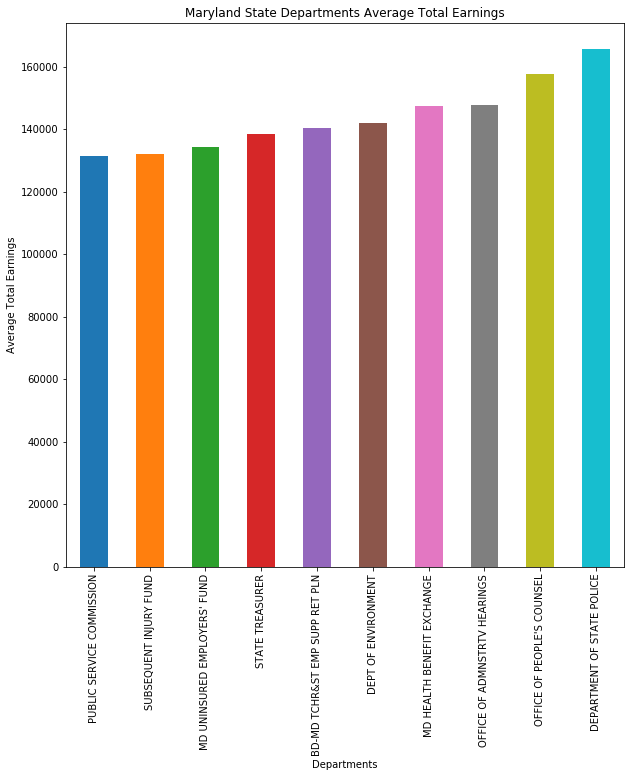

In [48]:
#Plotting the dictionary of departments and annual average salary as a bar graph

#ref:https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary
#ref:https://stackoverflow.com/questions/38338396/sort-and-limit-number-of-bars-to-display-on-bargraph


fig,ax= plt.subplots(figsize=(10,10))

plt.xlabel('Departments')
plt.ylabel('Average Total Earnings')
plt.title('Maryland State Departments Average Total Earnings')
plt.xticks(rotation=120)

top10_earnings = series2.sort_values(ascending=True).tail(10)
top10_earnings.plot(kind='bar')

Throughout my analysis of the 2019 Maryland State Employees Salaries dataset, I've realized the key variables to analyze and compare differences of were "organization", "annual_salary", "regular_earnings", "overtime_earnings", "other_earnings", "ytd_gross_earnings". The purpose behind the dataset was to provide information on how much each Maryland State employee from various Maryland State Departments earned during 2019. Other variables and factors taken into consideration are how much each employee from each department earned in different aspects outside of a regular salary. 

Knowledge Gained:

In the Data Exploration project, I learned how to use certain python functions such as unique, series, and sort values to edit the dataframe and the dataset to analyze the specific variables I am interested in analyzing: organization, annual salary, and earnings. 
